In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msngo
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

#### Objetivos

Dado la gran cantidad de atributos, se le entrega un script preproc_nyc_sqf.py que
normaliza la cantidad de atributos. Haga uso de la función create_suitable_dataframe
para igualar el benchmark de los atributos.

In [2]:
from preproc_nyc_sqf import *

Dado que se entregan 2 .xlsx uno para training y otro para test, es que se procede a cargar los correspondientes dataFrames

In [3]:
df_train = pd.read_csv('2009_1perc.csv').drop(columns= ['Unnamed: 0', 'xcoord', 'ycoord'])
df_train.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,city,state,zip,addrpct,sector,beat,post,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,BRONX,,,41,G,7,,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,QUEENS,,,108,J,,,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,BRONX,,,43,E,,,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,BROOKLYN,,,77,J,4,35,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,QUEENS,,,110,H,,,CM,1,20


In [4]:
df_test = pd.read_csv('2010_1perc.csv').drop(columns = 'Unnamed: 0')
df_test.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20


In [5]:
df_test.shape

(6013, 111)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 109 entries, year to detailcm
dtypes: float64(1), int64(18), object(90)
memory usage: 4.8+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 111 entries, year to detailcm
dtypes: int64(16), object(95)
memory usage: 5.1+ MB


Se observan 111 columnas, con 6013 observaciones, de los datos 16 son numericos y 95 del tipo object

Se realiza un pequeño analisis de como es que se comportan los datos en las respectivas columnas

In [8]:
for i in df_train:
    print("\n", i)
    print(df_train[i].value_counts("%")*100)


 year
2009    100.0
Name: year, dtype: float64

 pct
75     5.454233
73     4.783207
120    3.699243
79     3.303510
23     2.494838
40     2.460427
32     2.374398
103    2.150723
110    2.099105
44     2.030282
114    1.927047
113    1.927047
67     1.909842
115    1.858224
109    1.789401
43     1.754990
14     1.737784
90     1.720578
52     1.703372
70     1.686167
77     1.651755
42     1.582932
101    1.548520
83     1.531315
34     1.479697
60     1.479697
106    1.479697
81     1.445286
46     1.445286
25     1.428080
         ...   
9      0.946318
69     0.911906
61     0.911906
122    0.808672
72     0.808672
45     0.757054
26     0.722643
84     0.705437
66     0.688231
19     0.688231
7      0.653820
100    0.619408
13     0.602202
48     0.567791
112    0.567791
63     0.567791
24     0.550585
10     0.550585
94     0.481762
6      0.464556
68     0.464556
5      0.464556
123    0.395733
78     0.395733
1      0.378527
20     0.378527
18     0.361321
17     0.275292
50

Name: radio, dtype: float64

 ac_rept
N    87.336545
Y    12.663455
Name: ac_rept, dtype: float64

 ac_inves
N    87.456986
Y    12.543014
Name: ac_inves, dtype: float64

 rf_vcrim
N    89.143152
Y    10.856848
Name: rf_vcrim, dtype: float64

 rf_othsw
N    96.300757
Y     3.699243
Name: rf_othsw, dtype: float64

 ac_proxm
N    80.729525
Y    19.270475
Name: ac_proxm, dtype: float64

 rf_attir
N    91.225052
Y     8.774948
Name: rf_attir, dtype: float64

 cs_objcs
N    97.505162
Y     2.494838
Name: cs_objcs, dtype: float64

 cs_descr
N    85.667584
Y    14.332416
Name: cs_descr, dtype: float64

 cs_casng
N    70.216793
Y    29.783207
Name: cs_casng, dtype: float64

 cs_lkout
N    82.777013
Y    17.222987
Name: cs_lkout, dtype: float64

 rf_vcact
N    93.289745
Y     6.710255
Name: rf_vcact, dtype: float64

 cs_cloth
N    95.079147
Y     4.920853
Name: cs_cloth, dtype: float64

 cs_drgtr
N    90.622849
Y     9.377151
Name: cs_drgtr, dtype: float64

 ac_evasv
N    79.938059
Y    20.0619

Ya que se observa que muchas de las observaciones se encuentran en blanco, es que se procese a realizar una limpieza de estas, primero observando como es que se comportan los datos perdidos

In [9]:
df_train2 = df_train.replace(' ', np.nan)

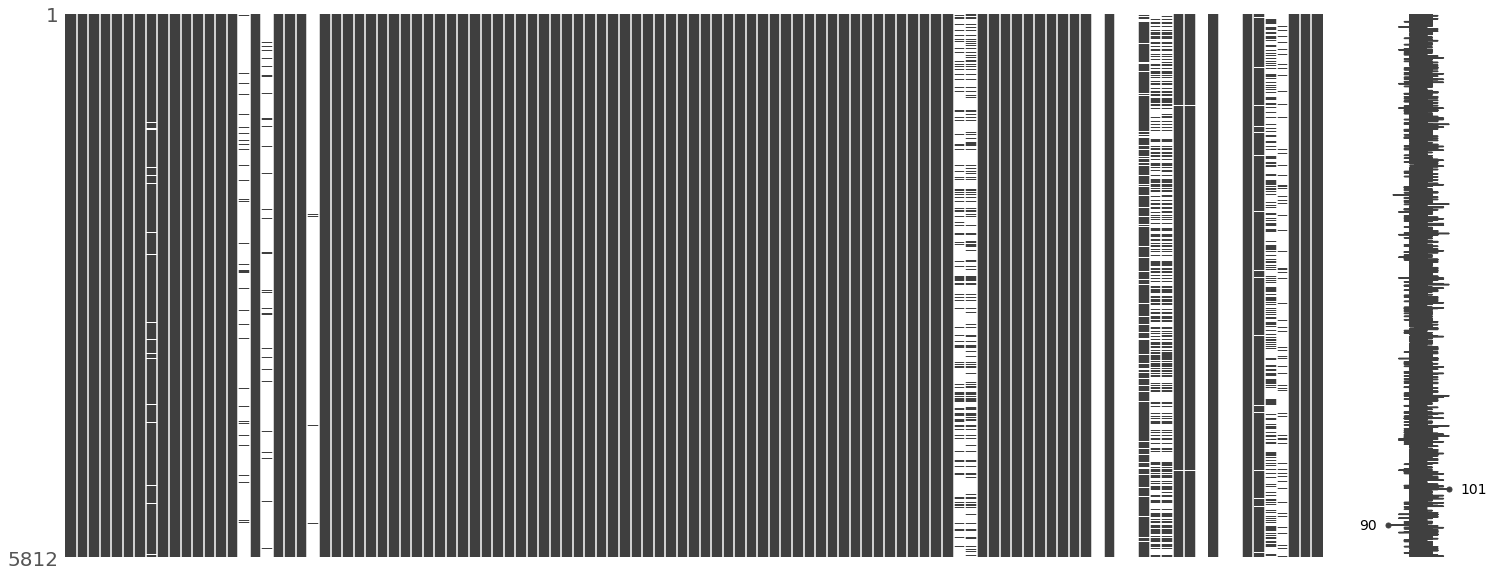

In [10]:
msngo.matrix(df_train2, [np.nan]);

In [11]:
conteo = pd.DataFrame(df_train2.isna().sum())
conteo.columns=['ceros']
conteo.sort_values(by=['ceros'],ascending=False)[:25]

,ceros
zip,5812
othfeatr,5812
premtype,5812
aptnum,5812
rescode,5812
state,5812
officrid,5727
arstoffn,5464
sumoffen,5456
post,5268


Una pequeña muestra de como es que se comportan los datos perdidos

Se procede a utilizar la funcion create_suitable_dataframe que normaliza la cantidad de atributos

In [12]:
create_suitable_dataframe(df_train)

['year', 'pct', 'ser_num', 'datestop', 'timestop', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'addrpct', 'linecm', 'detailcm', 'perobs']


(     recstat inout trhsloc typeofid explnstp othpers arstmade sumissue  \
 0          A     O       P        P        Y       N        N        N   
 2          1     O       P        V        Y       N        N        N   
 3          A     O       P        P        Y       N        N        N   
 5          1     I       T        V        Y       N        N        N   
 6          1     O       P        P        Y       N        N        N   
 8          A     O       P        P        Y       Y        N        N   
 9          A     O       P        P        Y       N        N        N   
 10         A     O       P        V        Y       N        N        N   
 11         1     I       T        O        Y       N        N        N   
 12         1     I       T        V        Y       Y        Y        N   
 14         A     O       P        P        Y       Y        N        N   
 16         A     O       P        V        Y       N        N        N   
 17         1     I      

In [13]:
df_train.shape

(5812, 112)

In [14]:
df_train.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,addrpct,sector,beat,post,dettypcm,linecm,detailcm,meters,month,age_individual
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,41,G,7,,CM,1,20,1.79832,4,24.0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,108,J,U,,CM,1,14,1.67640,10,NaN
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,43,E,U,,CM,1,20,1.92024,10,21.0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,77,J,4,35,CM,1,24,1.67640,12,22.0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,110,H,U,,CM,1,20,1.70688,12,NaN


In [15]:
for i in df_train:
    print("\n", i)
    print(df_train[i].value_counts("%")*100)


 year
2009    100.0
Name: year, dtype: float64

 pct
75     5.454233
73     4.783207
120    3.699243
79     3.303510
23     2.494838
40     2.460427
32     2.374398
103    2.150723
110    2.099105
44     2.030282
114    1.927047
113    1.927047
67     1.909842
115    1.858224
109    1.789401
43     1.754990
14     1.737784
90     1.720578
52     1.703372
70     1.686167
77     1.651755
42     1.582932
101    1.548520
83     1.531315
34     1.479697
60     1.479697
106    1.479697
81     1.445286
46     1.445286
25     1.428080
         ...   
9      0.946318
69     0.911906
61     0.911906
122    0.808672
72     0.808672
45     0.757054
26     0.722643
84     0.705437
66     0.688231
19     0.688231
7      0.653820
100    0.619408
13     0.602202
48     0.567791
112    0.567791
63     0.567791
24     0.550585
10     0.550585
94     0.481762
6      0.464556
68     0.464556
5      0.464556
123    0.395733
78     0.395733
1      0.378527
20     0.378527
18     0.361321
17     0.275292
50

Name: cs_lkout, dtype: float64

 rf_vcact
N    93.289745
Y     6.710255
Name: rf_vcact, dtype: float64

 cs_cloth
N    95.079147
Y     4.920853
Name: cs_cloth, dtype: float64

 cs_drgtr
N    90.622849
Y     9.377151
Name: cs_drgtr, dtype: float64

 ac_evasv
N    79.938059
Y    20.061941
Name: ac_evasv, dtype: float64

 ac_assoc
N    95.956641
Y     4.043359
Name: ac_assoc, dtype: float64

 cs_furtv
Y    51.032347
N    48.967653
Name: cs_furtv, dtype: float64

 rf_rfcmp
N    90.467997
Y     9.532003
Name: rf_rfcmp, dtype: float64

 ac_cgdir
N    75.309704
Y    24.690296
Name: ac_cgdir, dtype: float64

 rf_verbl
N    99.449415
Y     0.550585
Name: rf_verbl, dtype: float64

 cs_vcrim
N    90.898142
Y     9.101858
Name: cs_vcrim, dtype: float64

 cs_bulge
N    90.261528
Y     9.738472
Name: cs_bulge, dtype: float64

 cs_other
N    81.72746
Y    18.27254
Name: cs_other, dtype: float64

 ac_incid
Y    56.916724
N    43.083276
Name: ac_incid, dtype: float64

 ac_time
N    59.979353
Y    40.02

In [16]:
df_train_f = df_train.replace(' ', np.nan)

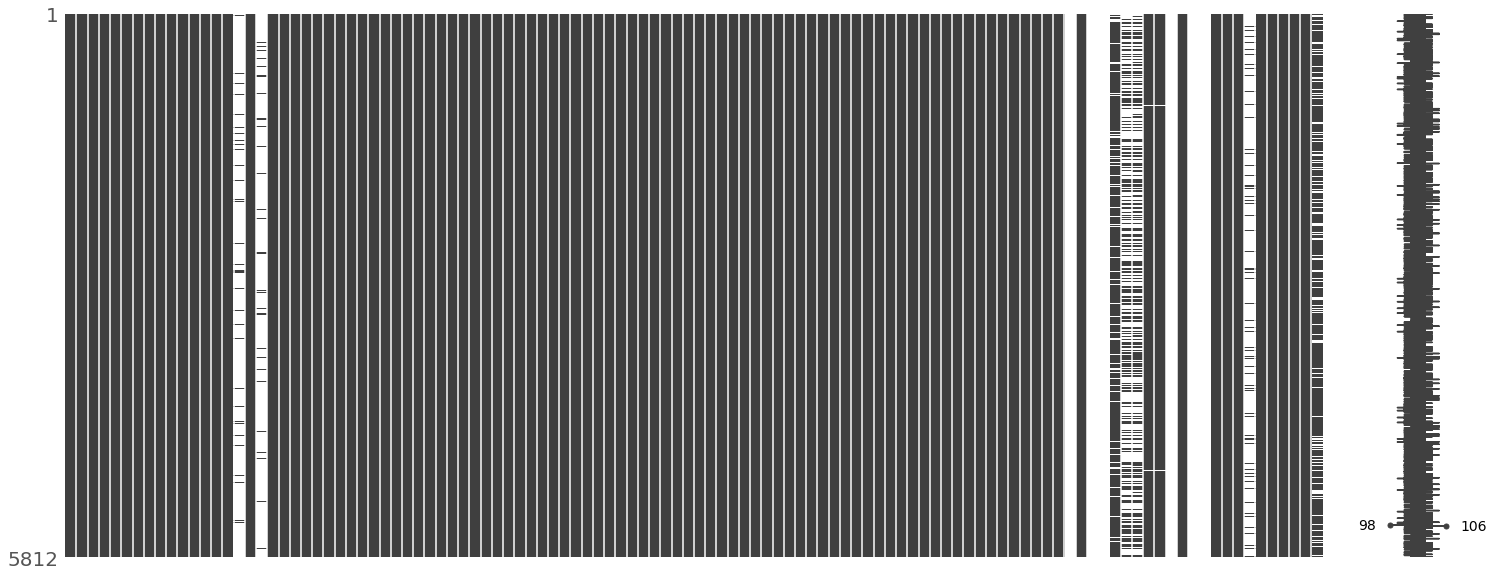

In [17]:
msngo.matrix(df_train_f, [np.nan]);

In [18]:
conteo = pd.DataFrame(df_train_f.isna().sum())
conteo.columns=['ceros']
conteo.sort_values(by=['ceros'],ascending=False)[:25]

,ceros
zip,5812
othfeatr,5812
rescode,5812
premtype,5812
aptnum,5812
state,5812
arstoffn,5464
sumoffen,5456
post,5268
addrnum,3300


Se eliminaran aquellas columnas, que posean mas de la mitad de los datos perdidos

In [19]:
df_train_f = df_train_f.drop(columns=conteo[conteo['ceros']>int(df_train_f.shape[0]/2)].index)

In [20]:
conteo = pd.DataFrame(df_train_f.isna().sum())
conteo.columns=['ceros']
conteo.sort_values(by=['ceros'],ascending=False)[:25]

,ceros
age_individual,1176
premname,591
crossst,40
stinter,40
ac_evasv,0
ac_time,0
revcmd,0
repcmd,0
sb_other,0
sb_admis,0


In [21]:
df_train_f.shape

(5812, 101)

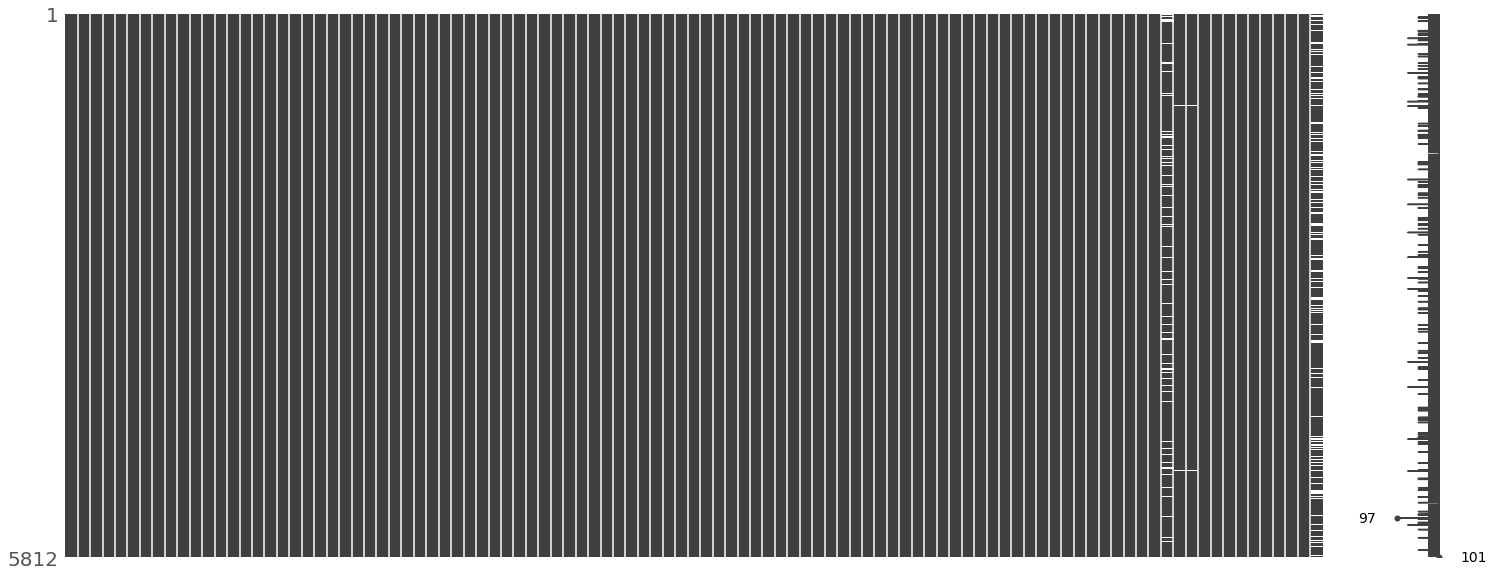

In [22]:
msngo.matrix(df_train_f, [np.nan]);

Se analiza el vector objetivo posterior a la eliminacion de los atributos y tambien se recodificara este vector

In [23]:
df_train_f['arstmade'].value_counts('%')

N    0.940124
Y    0.059876
Name: arstmade, dtype: float64

In [24]:
df_train_f['arstmade'] = np.where(df_train_f['arstmade'] == 'Y', 0, 1)
df_train_f['arstmade'].value_counts('%')

1    0.940124
0    0.059876
Name: arstmade, dtype: float64

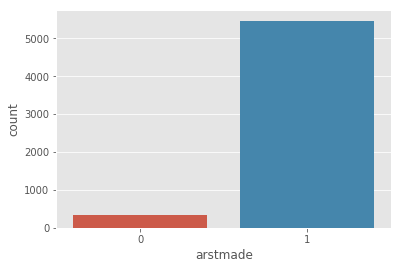

In [25]:
sns.countplot(df_train_f['arstmade'])

Cabe destacar el fuerte desvalanceo de clases que se observa en el vector objetivo

Se eliminaran los datos perdidos, para poder realizar predicciones sobre el vector objetivo

In [26]:
df_train_f.dropna(inplace=True)
df_train_f.shape

(4121, 101)

In [27]:
df_train_f['arstmade'].value_counts('%')

1    0.939578
0    0.060422
Name: arstmade, dtype: float64

In [28]:
muy_largas = []
for x,i in df_train_f.iteritems():
    if(np.dtype(i)=='object'):   
        print(x)
        print(i.value_counts())
        print('\n')
        if len(i.value_counts('%').index)>30:
            muy_largas.append(x)

recstat
A    2634
1    1487
Name: recstat, dtype: int64


inout
O    3086
I    1035
Name: inout, dtype: int64


trhsloc
P    2937
H     700
T     334
U     150
Name: trhsloc, dtype: int64


crimsusp
FEL                               549
CPW                               519
MISD                              454
FELONY                            381
ROBBERY                           293
GLA                               243
BURGLARY                          188
CRIM TRES                         118
CRIMINAL TRESPASS                  89
ASSAULT                            74
GRAND LARCENY                      74
CPCS                               73
MIS                                64
BURG                               60
CPM                                56
PETIT LARCENY                      53
CSCS                               47
CRIM TRESS                         35
ROB                                31
C.P.W.                             24
CT                                 24
F  

beat
U     2682
9      176
1      120
7      113
10     105
2      101
8       96
11      84
5       84
4       77
3       69
6       68
15      49
13      45
16      39
12      38
14      36
17      34
18      22
24      17
19      16
22      11
62       8
20       6
23       5
21       5
61       4
25       4
41       3
42       3
32       1
Name: beat, dtype: int64


dettypcm
CM    4121
Name: dettypcm, dtype: int64




Despues del analizis realizado se observa que existen features del tipo Object que tienen gran cantidad de posibilidades, y binarizarlas podria generar una gran sobrecarga en el modelo posterior, por lo que algunas de estas seran dropeadas

In [29]:
for i in muy_largas:
    df_train_f[i] = df_train_f[i].replace(list(df_train_f[i].value_counts(ascending=True)[:-10].index),'other')

In [30]:
muy_largas = []
for x,i in df_train_f.iteritems():
    if(np.dtype(i)=='object'):   
        print(x)
        print(i.value_counts())
        print('\n')
        if len(i.value_counts('%').index)>30:
            muy_largas.append(x)

recstat
A    2634
1    1487
Name: recstat, dtype: int64


inout
O    3086
I    1035
Name: inout, dtype: int64


trhsloc
P    2937
H     700
T     334
U     150
Name: trhsloc, dtype: int64


crimsusp
other                1213
FEL                   549
CPW                   519
MISD                  454
FELONY                381
ROBBERY               293
GLA                   243
BURGLARY              188
CRIM TRES             118
CRIMINAL TRESPASS      89
ASSAULT                74
Name: crimsusp, dtype: int64


typeofid
P    2507
V    1517
O      54
R      43
Name: typeofid, dtype: int64


explnstp
Y    4119
N       2
Name: explnstp, dtype: int64


othpers
N    3376
Y     745
Name: othpers, dtype: int64


sumissue
N    3855
Y     266
Name: sumissue, dtype: int64


offunif
Y    2916
N    1205
Name: offunif, dtype: int64


officrid
N    4066
Y      55
Name: officrid, dtype: int64


frisked
Y    2318
N    1803
Name: frisked, dtype: int64


searched
N    3765
Y     356
Name: searched, dtype

In [31]:
df_train_f.shape

(4121, 101)

###### Graficos

In [32]:
"""%matplotlib inline
columns = df_train_f.columns
for index, (colnames, serie) in enumerate(df_train_f.iteritems()):
    plt.figure(figsize=(10,40))
    plt.subplot(len(columns)+1,1, index + 1)
    if serie.dtype == 'object':
        sns.countplot(serie)
        plt.title('Frecuencias para {}'.format(colnames))
        plt.show()
    else:
        sns.distplot(serie)
        plt.axvline(np.mean(df_train_f[colnames]), color='tomato')
        plt.title('Distribución para {}'.format(colnames))
        plt.show()"""

"%matplotlib inline\ncolumns = df_train_f.columns\nfor index, (colnames, serie) in enumerate(df_train_f.iteritems()):\n    plt.figure(figsize=(10,40))\n    plt.subplot(len(columns)+1,1, index + 1)\n    if serie.dtype == 'object':\n        sns.countplot(serie)\n        plt.title('Frecuencias para {}'.format(colnames))\n        plt.show()\n    else:\n        sns.distplot(serie)\n        plt.axvline(np.mean(df_train_f[colnames]), color='tomato')\n        plt.title('Distribución para {}'.format(colnames))\n        plt.show()"

In [33]:
df_train_f=df_train_f.drop(columns='beat')

Se utilizara la funcion 'get_dummies' para poder generar la binarizacion de estas columnas

In [34]:
for colname, serie in df_train_f.iteritems():
    if serie.dtype == 'object':
        df_train_f=pd.concat([df_train_f, pd.get_dummies(serie, drop_first=True,prefix=colname)], axis=1) 
        df_train_f = df_train_f.drop(columns = colname)

In [35]:
df_train_f.shape

(4121, 182)

In [36]:
for colname, serie in df_train_f.iteritems():
    print(colname)
    print(serie.value_counts('%'))
    print('\n')

year
2009    1.0
Name: year, dtype: float64


pct
75     0.056540
120    0.042708
73     0.042223
79     0.037370
23     0.027178
40     0.026207
110    0.024023
115    0.022810
103    0.021597
113    0.021354
32     0.021111
109    0.020626
43     0.018442
67     0.018442
77     0.018199
52     0.017957
34     0.017957
44     0.017714
90     0.017229
42     0.017229
28     0.016744
83     0.016744
101    0.016016
106    0.016016
25     0.015773
14     0.015530
114    0.015045
60     0.014802
70     0.014560
41     0.014317
         ...   
66     0.008008
45     0.008008
111    0.008008
26     0.008008
19     0.007522
7      0.007280
10     0.007280
62     0.007280
71     0.007037
84     0.007037
13     0.006794
48     0.006794
72     0.006794
6      0.006552
24     0.006066
112    0.005824
94     0.005339
63     0.005096
68     0.005096
1      0.004853
5      0.004853
20     0.004368
18     0.004368
78     0.004368
50     0.003155
46     0.002669
100    0.001699
17     0.001699
22    

0    0.964086
1    0.035914
Name: pf_hcuff_Y, dtype: float64


pf_pepsp_Y
0    0.999757
1    0.000243
Name: pf_pepsp_Y, dtype: float64


pf_other_Y
0    0.995389
1    0.004611
Name: pf_other_Y, dtype: float64


radio_Y
0    0.776025
1    0.223975
Name: radio_Y, dtype: float64


ac_rept_Y
0    0.88231
1    0.11769
Name: ac_rept_Y, dtype: float64


ac_inves_Y
0    0.875273
1    0.124727
Name: ac_inves_Y, dtype: float64


rf_vcrim_Y
0    0.894686
1    0.105314
Name: rf_vcrim_Y, dtype: float64


rf_othsw_Y
0    0.961417
1    0.038583
Name: rf_othsw_Y, dtype: float64


ac_proxm_Y
0    0.812667
1    0.187333
Name: ac_proxm_Y, dtype: float64


rf_attir_Y
0    0.912643
1    0.087357
Name: rf_attir_Y, dtype: float64


cs_objcs_Y
0    0.973793
1    0.026207
Name: cs_objcs_Y, dtype: float64


cs_descr_Y
0    0.865567
1    0.134433
Name: cs_descr_Y, dtype: float64


cs_casng_Y
0    0.69886
1    0.30114
Name: cs_casng_Y, dtype: float64


cs_lkout_Y
0    0.830624
1    0.169376
Name: cs_lkout_Y, dtyp

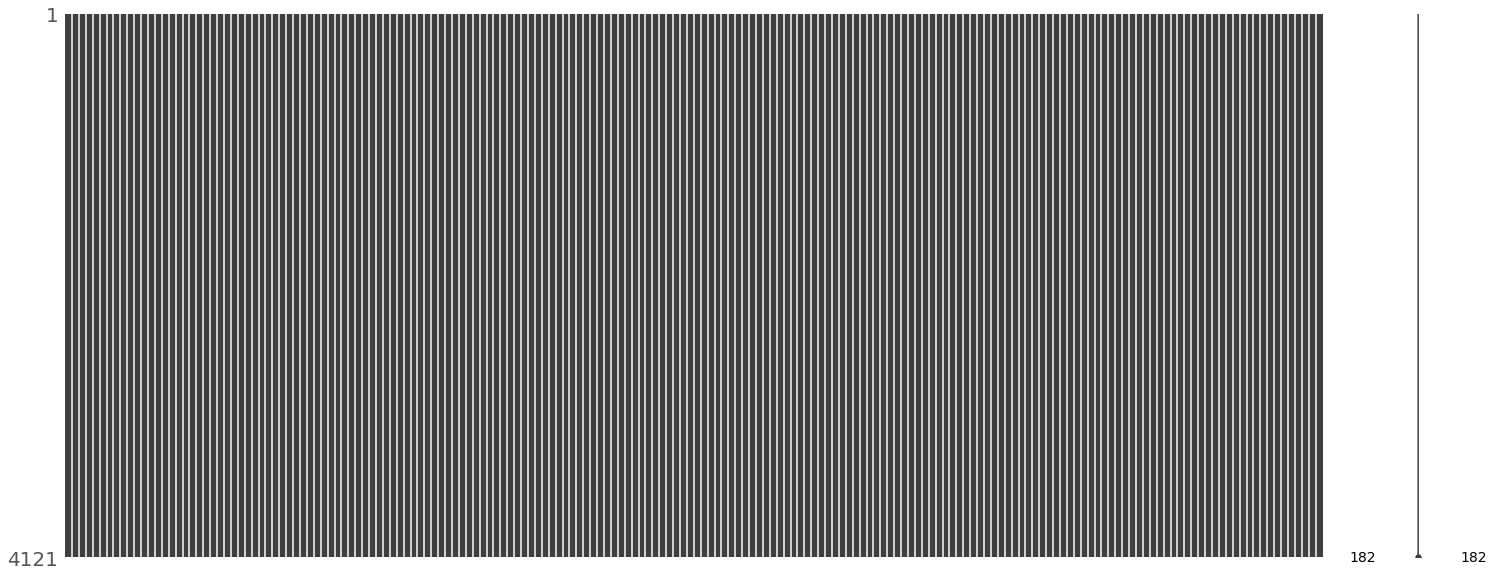

In [37]:
msngo.matrix(df_train_f)

In [38]:
df_train_f.columns = df_train_f.columns.str.replace(' ', '')

In [39]:
list(df_train_f.columns).remove('arstmade')

In [40]:
col = list(df_train_f.columns)
col.remove('arstmade')
columnas = ' + '.join(col)
reg = 'arstmade'+' ~ '+columnas
reg

'arstmade ~ year + pct + ser_num + datestop + timestop + perobs + perstop + compyear + comppct + repcmd + revcmd + dob + age + ht_feet + ht_inch + weight + addrpct + linecm + detailcm + meters + month + age_individual + recstat_A + inout_O + trhsloc_P + trhsloc_T + trhsloc_U + crimsusp_BURGLARY + crimsusp_CPW + crimsusp_CRIMTRES + crimsusp_CRIMINALTRESPASS + crimsusp_FEL + crimsusp_FELONY + crimsusp_GLA + crimsusp_MISD + crimsusp_ROBBERY + crimsusp_other + typeofid_P + typeofid_R + typeofid_V + explnstp_Y + othpers_Y + sumissue_Y + offunif_Y + officrid_Y + frisked_Y + searched_Y + contrabn_Y + pistol_Y + riflshot_Y + asltweap_Y + knifcuti_Y + othrweap_Y + pf_hands_Y + pf_wall_Y + pf_grnd_Y + pf_drwep_Y + pf_ptwep_Y + pf_baton_Y + pf_hcuff_Y + pf_pepsp_Y + pf_other_Y + radio_Y + ac_rept_Y + ac_inves_Y + rf_vcrim_Y + rf_othsw_Y + ac_proxm_Y + rf_attir_Y + cs_objcs_Y + cs_descr_Y + cs_casng_Y + cs_lkout_Y + rf_vcact_Y + cs_cloth_Y + cs_drgtr_Y + ac_evasv_Y + ac_assoc_Y + cs_furtv_Y + rf_r

In [41]:
import statsmodels.formula.api as smf


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(df_train_f[col])
X_train = pd.DataFrame(X_train,columns=col)
X_train.index = df_train_f.index


In [44]:
df = pd.concat([X_train,df_train_f['arstmade']],axis=1)
df.head()

,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,...,sector_J,sector_K,sector_M,sector_N,sector_P,sector_Q,sector_R,sector_T,sector_U,arstmade
0,0.0,-0.817646,-0.722604,-0.644744,-1.672359,-0.429616,-0.670136,0.0,0.0,-0.698160,...,-0.25950,-0.188911,-0.170941,-0.110824,-0.140702,-0.093876,-0.04932,-0.101472,-0.11843,1
2,0.0,-0.758281,0.456240,1.093276,0.071576,-0.429616,-0.868046,0.0,0.0,-0.691615,...,-0.25950,-0.188911,-0.170941,-0.110824,-0.140702,-0.093876,-0.04932,-0.101472,-0.11843,1
3,0.0,0.250912,-0.874788,-1.451784,0.590793,0.595358,-0.076407,0.0,0.0,-0.580339,...,3.85357,-0.188911,-0.170941,-0.110824,-0.140702,-0.093876,-0.04932,-0.101472,-0.11843,1
5,0.0,-1.619064,-0.109016,-0.301751,0.849741,1.107846,-0.868046,0.0,0.0,1.985551,...,-0.25950,-0.188911,-0.170941,-0.110824,-0.140702,-0.093876,-0.04932,-0.101472,-0.11843,1
6,0.0,-0.045910,1.070367,1.433386,-1.700103,0.595358,-0.076407,0.0,0.0,-0.256330,...,-0.25950,-0.188911,-0.170941,9.023303,-0.140702,-0.093876,-0.04932,-0.101472,-0.11843,1


In [45]:
a = df.corr().where(abs(df.corr())==1)
for n,v in a.iteritems():
    if list(v.value_counts())==[2]:
        print(n)

pct
age
addrpct
age_individual


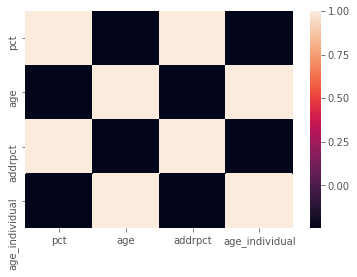

In [46]:
sns.heatmap(df.corr()[['pct','age','addrpct','age_individual']].corr())

In [47]:
df = df.drop(columns=['addrpct','age_individual'])

In [48]:
a = df.corr().where(abs(df.corr())==1)
for n,v in a.iteritems():
    if list(v.value_counts())==[2]:
        print(n)

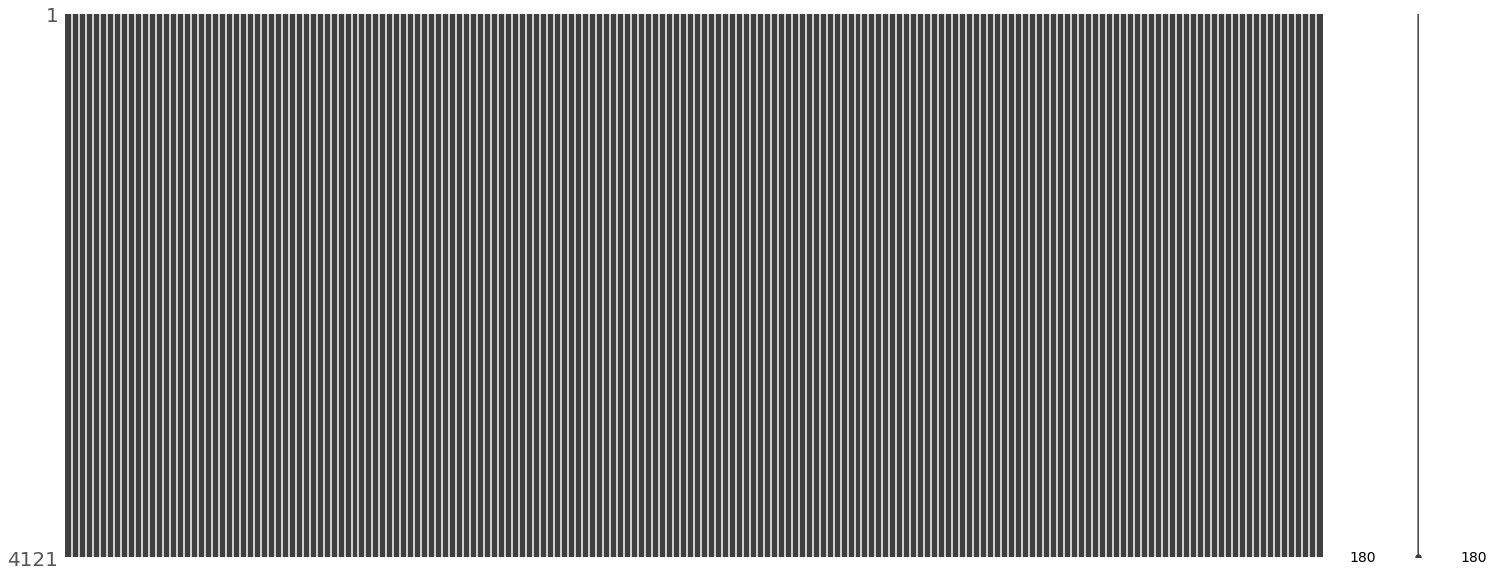

In [49]:
msngo.matrix(df)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4121 entries, 0 to 5811
Columns: 180 entries, year to arstmade
dtypes: float64(179), int64(1)
memory usage: 5.7 MB


In [51]:
col = list(df.columns)
col.remove('arstmade')
columnas = ' + '.join(col)
reg = 'arstmade'+' ~ '+columnas
reg

'arstmade ~ year + pct + ser_num + datestop + timestop + perobs + perstop + compyear + comppct + repcmd + revcmd + dob + age + ht_feet + ht_inch + weight + linecm + detailcm + meters + month + recstat_A + inout_O + trhsloc_P + trhsloc_T + trhsloc_U + crimsusp_BURGLARY + crimsusp_CPW + crimsusp_CRIMTRES + crimsusp_CRIMINALTRESPASS + crimsusp_FEL + crimsusp_FELONY + crimsusp_GLA + crimsusp_MISD + crimsusp_ROBBERY + crimsusp_other + typeofid_P + typeofid_R + typeofid_V + explnstp_Y + othpers_Y + sumissue_Y + offunif_Y + officrid_Y + frisked_Y + searched_Y + contrabn_Y + pistol_Y + riflshot_Y + asltweap_Y + knifcuti_Y + othrweap_Y + pf_hands_Y + pf_wall_Y + pf_grnd_Y + pf_drwep_Y + pf_ptwep_Y + pf_baton_Y + pf_hcuff_Y + pf_pepsp_Y + pf_other_Y + radio_Y + ac_rept_Y + ac_inves_Y + rf_vcrim_Y + rf_othsw_Y + ac_proxm_Y + rf_attir_Y + cs_objcs_Y + cs_descr_Y + cs_casng_Y + cs_lkout_Y + rf_vcact_Y + cs_cloth_Y + cs_drgtr_Y + ac_evasv_Y + ac_assoc_Y + cs_furtv_Y + rf_rfcmp_Y + ac_cgdir_Y + rf_ve

In [52]:
df2 = df.drop(columns=['year','compyear','comppct','linecm'])

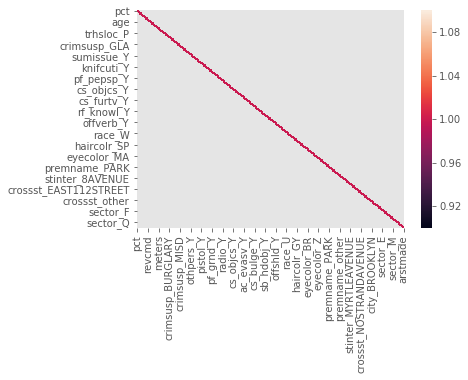

In [53]:
sns.heatmap(df2.corr()[df2.corr()==1])

In [54]:
col = list(df2.columns)
col.remove('arstmade')
columnas = ' + '.join(col)
reg = 'arstmade'+' ~ '+columnas
reg

'arstmade ~ pct + ser_num + datestop + timestop + perobs + perstop + repcmd + revcmd + dob + age + ht_feet + ht_inch + weight + detailcm + meters + month + recstat_A + inout_O + trhsloc_P + trhsloc_T + trhsloc_U + crimsusp_BURGLARY + crimsusp_CPW + crimsusp_CRIMTRES + crimsusp_CRIMINALTRESPASS + crimsusp_FEL + crimsusp_FELONY + crimsusp_GLA + crimsusp_MISD + crimsusp_ROBBERY + crimsusp_other + typeofid_P + typeofid_R + typeofid_V + explnstp_Y + othpers_Y + sumissue_Y + offunif_Y + officrid_Y + frisked_Y + searched_Y + contrabn_Y + pistol_Y + riflshot_Y + asltweap_Y + knifcuti_Y + othrweap_Y + pf_hands_Y + pf_wall_Y + pf_grnd_Y + pf_drwep_Y + pf_ptwep_Y + pf_baton_Y + pf_hcuff_Y + pf_pepsp_Y + pf_other_Y + radio_Y + ac_rept_Y + ac_inves_Y + rf_vcrim_Y + rf_othsw_Y + ac_proxm_Y + rf_attir_Y + cs_objcs_Y + cs_descr_Y + cs_casng_Y + cs_lkout_Y + rf_vcact_Y + cs_cloth_Y + cs_drgtr_Y + ac_evasv_Y + ac_assoc_Y + cs_furtv_Y + rf_rfcmp_Y + ac_cgdir_Y + rf_verbl_Y + cs_vcrim_Y + cs_bulge_Y + cs_

In [55]:
model_logit = smf.logit(formula=reg,data = df2).fit(method='bfgs')
model_logit.summary()

         Current function value: 0.076080
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               arstmade   No. Observations:                 4121
Model:                          Logit   Df Residuals:                     3945
Method:                           MLE   Df Model:                          175
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.6665
Time:                        09:52:55   Log-Likelihood:                -313.53
converged:                      False   LL-Null:                       -940.11
                                        LLR p-value:                3.362e-162
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.1093      0.252     20.297      0.000       4.616       5.603
pct                             0.1352      0.648      0.209      0.835      -1.134       1.404
ser_num                         0.2973      0.220      1.350      0.177      -0.134       0.729
datestop                       -0.1161      0.216     -0.537      0.592      -0.540       0.308
timestop                        0.1917      0.128      1.502      0.133      -0.058       0.442
perobs                         -0.2881      0.094     -3.063      0.002      -0.472      -0.104
perstop                         0.0934      0.156      0.600      0.549      -0.212       0.399
repcmd                          0.0942      0.665      0.142      0.887      -1.210       1.398
revcmd                          0.1241      0.663      0.187      0.852      -1.176       1.424
dob                            -0.0867      0.124     -0.699      0.484      -0.330       0.156
age                            -0.2222      0.129     -1.724      0.085      -0.475       0.030
ht_feet                         0.1133      0.251      0.452      0.651      -0.378       0.605
ht_inch                         0.1681      0.229      0.735      0.463      -0.280       0.617
weight                         -0.0945      0.156     -0.605      0.545      -0.401       0.212
detailcm                       -0.3188      0.175     -1.826      0.068      -0.661       0.023
meters                         -0.0939      0.170     -0.551      0.582      -0.428       0.240
month                          -0.2394      0.186     -1.287      0.198      -0.604       0.125
recstat_A                      -0.2096      0.193     -1.086      0.278      -0.588       0.169
inout_O                         0.2187      0.202      1.081      0.280      -0.178       0.615
trhsloc_P                      -0.0570      0.296     -0.193      0.847      -0.638       0.524
trhsloc_T                       0.1767      0.227      0.777      0.437      -0.269       0.622
trhsloc_U                      -0.0290      0.185     -0.157      0.876      -0.391       0.333
crimsusp_BURGLARY              -0.0704      0.235     -0.299      0.765      -0.532       0.391
crimsusp_CPW                   -0.0188      0.331     -0.057      0.955      -0.667       0.629
crimsusp_CRIMTRES              -0.0205      0.226     -0.091      0.928      -0.464       0.423
crimsusp_CRIMINALTRESPASS      -0.3423      0.162     -2.107      0.035      -0.661      -0.024
crimsusp_FEL                    0.1625      0.350      0.464      0.643      -0.524       0.849
crimsusp_FELONY                 0.3684      0.334      1.103      0.270      -0.286       1.023
crimsusp_GLA                    0.0321      0.273      0.118      0.906      -0.502       0.567
crimsusp_MISD                  -0.2106      0.309     -0.682      0.495      -0.816       0.394
crimsusp_ROBBERY                0.1123      0.296      0.380      0.704  

In [57]:
parametros = model_logit.summary2()

In [64]:
parametros = parametros.tables[1]

In [90]:
parametros[['P>|z|']].sort_values(by='P>|z|')[parametros[['P>|z|']].sort_values(by='P>|z|',ascending='False')>.25][len(parametros)-30:].index

Index(['stinter_other', 'eyecolor_BR', 'city_BROOKLYN', 'repcmd', 'race_B',
       'ac_evasv_Y', 'premname_LOBBY', 'cs_descr_Y', 'race_P', 'crimsusp_GLA',
       'pf_grnd_Y', 'asltweap_Y', 'build_T', 'crimsusp_CRIMTRES', 'cs_bulge_Y',
       'sb_admis_Y', 'ac_proxm_Y', 'eyecolor_MA', 'crimsusp_CPW', 'cs_lkout_Y',
       'haircolr_BK', 'stinter_8AVENUE', 'haircolr_BL', 'premname_SIDEWALK',
       'race_Q', 'typeofid_V', 'offshld_Y', 'haircolr_DY', 'pf_pepsp_Y',
       'stinter_SAINTNICHOLASAVENUE'],
      dtype='object')

In [91]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [93]:
X = df2.drop(columns='arstmade')
Y = df2['arstmade']

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,random_state=11238)

In [116]:

parameter_Gradient={'learning_rate': [0.1,0.3, 0.5,0.8],'n_estimators': [500, 1000, 1500,2000],'subsample': [0.3,0.5,0.6,0.8]}

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
cl_Gradient = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parameter_Gradient, n_jobs=-1,cv=2)

In [118]:
cl_Gradient.fit(X_train, y_train)

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [119]:
model = cl_Gradient.best_estimator_

In [138]:
def plot_feature_importance(fit_model, feat_names,lista):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.barh(
        range(len(feat_names)), tmp_importance[sort_importance]
    )
    plt.yticks(range(len(feat_names)),
               names, rotation=0)
    plt.show()
    lista = names
    return lista

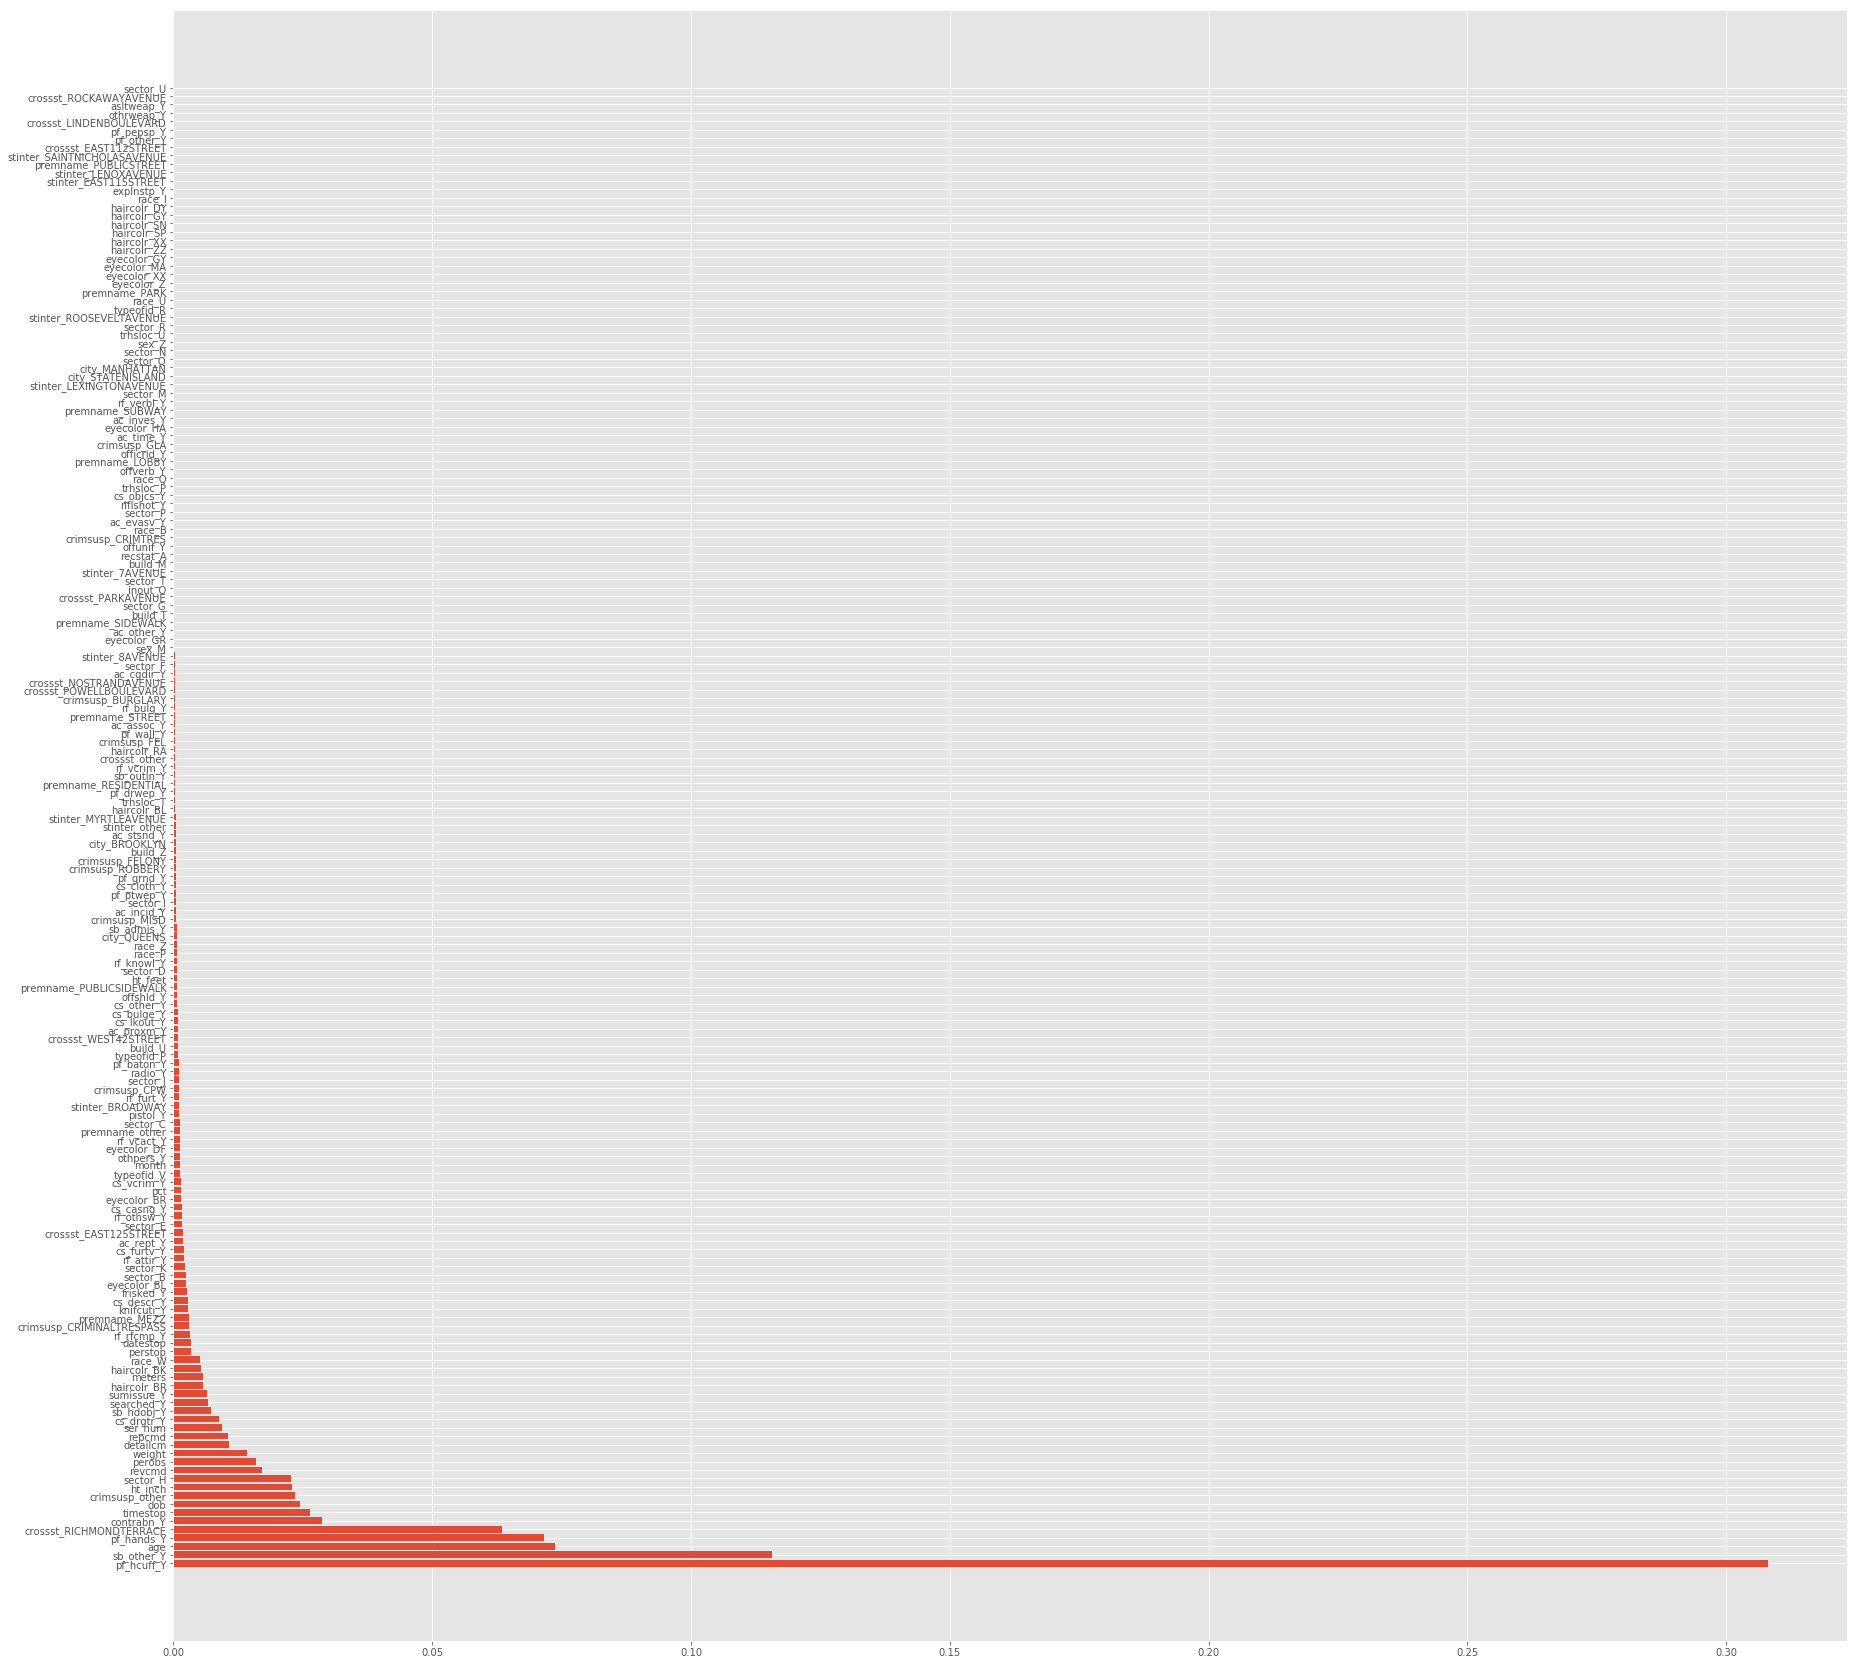

In [139]:
plt.figure(figsize=(30,30))
a = plot_feature_importance(model,X.columns,lista)

In [140]:
a

['pf_hcuff_Y',
 'sb_other_Y',
 'age',
 'pf_hands_Y',
 'crossst_RICHMONDTERRACE',
 'contrabn_Y',
 'timestop',
 'dob',
 'crimsusp_other',
 'ht_inch',
 'sector_H',
 'revcmd',
 'perobs',
 'weight',
 'detailcm',
 'repcmd',
 'ser_num',
 'cs_drgtr_Y',
 'sb_hdobj_Y',
 'searched_Y',
 'sumissue_Y',
 'haircolr_BR',
 'meters',
 'haircolr_BK',
 'race_W',
 'perstop',
 'datestop',
 'rf_rfcmp_Y',
 'crimsusp_CRIMINALTRESPASS',
 'premname_MEZZ',
 'knifcuti_Y',
 'cs_descr_Y',
 'frisked_Y',
 'eyecolor_BL',
 'sector_B',
 'sector_K',
 'rf_attir_Y',
 'cs_furtv_Y',
 'ac_rept_Y',
 'crossst_EAST125STREET',
 'sector_E',
 'rf_othsw_Y',
 'cs_casng_Y',
 'eyecolor_BR',
 'pct',
 'cs_vcrim_Y',
 'typeofid_V',
 'month',
 'othpers_Y',
 'eyecolor_DF',
 'rf_vcact_Y',
 'premname_other',
 'sector_C',
 'pistol_Y',
 'stinter_BROADWAY',
 'rf_furt_Y',
 'crimsusp_CPW',
 'sector_J',
 'radio_Y',
 'pf_baton_Y',
 'typeofid_P',
 'build_U',
 'crossst_WEST42STREET',
 'ac_proxm_Y',
 'cs_lkout_Y',
 'cs_bulge_Y',
 'cs_other_Y',
 'offshld_Y

In [152]:
mejores_30 = a[:30]
mejores_30

['pf_hcuff_Y',
 'sb_other_Y',
 'age',
 'pf_hands_Y',
 'crossst_RICHMONDTERRACE',
 'contrabn_Y',
 'timestop',
 'dob',
 'crimsusp_other',
 'ht_inch',
 'sector_H',
 'revcmd',
 'perobs',
 'weight',
 'detailcm',
 'repcmd',
 'ser_num',
 'cs_drgtr_Y',
 'sb_hdobj_Y',
 'searched_Y',
 'sumissue_Y',
 'haircolr_BR',
 'meters',
 'haircolr_BK',
 'race_W',
 'perstop',
 'datestop',
 'rf_rfcmp_Y',
 'crimsusp_CRIMINALTRESPASS',
 'premname_MEZZ']

In [146]:
create_suitable_dataframe(df_test)

['year', 'pct', 'ser_num', 'datestop', 'timestop', 'perobs', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight']


(     recstat inout trhsloc typeofid explnstp othpers arstmade sumissue  \
 0          1     O       P        P        Y       N        N        N   
 1          1     I       T        V        Y       N        N        N   
 2          1     I       T        V        Y       N        N        N   
 3          1     O       P        V        Y       N        N        N   
 4          1     I       T        P        Y       N        N        N   
 5          A     O       P        P        Y       N        N        N   
 6          1     O       H        R        Y       N        N        N   
 8          A     I       P        P        Y       N        N        Y   
 9          A     O       P        P        Y       N        N        N   
 11         A     O       P        P        Y       N        Y        N   
 12         A     O       P        P        Y       Y        N        N   
 13         1     O       P        P        Y       N        N        N   
 15         1     O      

In [149]:
X = df_test.drop(columns='arstmade')

In [150]:
df_test= df_test.drop(columns=conteo[conteo['ceros']>int(df_test.shape[0]/2)].index)
df_test['arstmade'] = np.where(df_test['arstmade'] == 'Y', 0, 1)
df_test.dropna(inplace=True)
muy_largas = []
for x,i in df_test.iteritems():
    if(np.dtype(i)=='object'):   
        print(x)
        print(i.value_counts())
        print('\n')
        if len(i.value_counts('%').index)>30:
            muy_largas.append(x)
for i in muy_largas:
    df_test[i] = df_test[i].replace(list(df_test[i].value_counts(ascending=True)[:-10].index),'other')
df_test=df_test.drop(columns='beat')
for colname, serie in df_test.iteritems():
    if serie.dtype == 'object':
        df_test=pd.concat([df_test, pd.get_dummies(serie, drop_first=True,prefix=colname)], axis=1) 
        df_test= df_test.drop(columns = colname)

ValueError: could not convert string to float: 'CM'

In [ ]:
df_train2 = df_train.replace(' ', np.nan)
c
df_train_f = df_train.replace(' ', np.nan)